In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Implement KMeans

you will need

1. function to return clusters (in any way you think is ok) for the given data and centroids

2. function to return centroids (in any way you think is ok) for the given data

3. several iterations over steps 1 and 2

In [23]:
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

In [24]:
centroid=np.random.permutation(X)[:4]
centroid

array([[ 1.07627418,  4.68480619],
       [ 2.47434181,  0.89992619],
       [ 3.22881491,  1.13171965],
       [-0.96142314,  2.75732541]])

In [25]:
def calc_distance(a,b):
    return (sum((a-b)**2))**0.5

In [26]:
def clusters(data,centroids):
    clusters=[]
    for i in range(data.shape[0]):
        distances=[]
        for j in centroids:
            distances.append(calc_distance(j, data[i]))
    
        for x, y in enumerate(distances):
            if y == min(distances):
                clusters.append(x)                
    
    return clusters

In [27]:
new_clusters=clusters(X,centroid)
type(new_clusters)

list

In [28]:
def find_centroids(clusters,data):
    df = pd.concat([pd.DataFrame(X, columns=['x','y']),pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    _centroids = df.groupby('cluster').mean()
    return _centroids

In [29]:
a=find_centroids(new_clusters,X)
new_centroids=a.values
new_centroids

array([[-0.16886154,  6.10670409],
       [ 1.8927151 ,  0.81282579],
       [ 3.13388584,  1.03608552],
       [-1.5300029 ,  2.85046367]])

In [30]:
new_clusters=clusters(X,new_centroids)

In [36]:
new_clusters=clusters(X,new_centroids)
new_centroids=a.values

for i in range(10):
    a=find_centroids(new_clusters, X)
    new_centroids=a.values
    new_clusters=clusters(X,new_centroids)
    
print(new_centroids,'\n',new_clusters)

[[-1.2689694   7.75608144]
 [ 1.95662677  0.83945671]
 [ 0.95041055  4.36874542]
 [-1.61366997  2.84849883]] 
 [0, 3, 3, 2, 3, 0, 1, 2, 3, 1, 0, 1, 2, 3, 3, 1, 3, 1, 2, 3, 3, 3, 0, 2, 2, 0, 0, 2, 2, 1, 2, 2, 3, 2, 3, 0, 1, 2, 1, 2, 3, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 2, 3, 0, 3, 2, 3, 0, 1, 3, 2, 3, 0, 3, 3, 2, 1, 0, 2, 3, 3, 2, 3, 1, 3, 1, 2, 3, 3, 0, 2, 1, 1, 1, 0, 1, 2, 2, 3, 0, 2, 0, 1, 3, 3, 3, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 3, 2, 3, 0, 2, 0, 3, 2, 3, 3, 0, 3, 1, 2, 3, 1, 3, 1, 2, 1, 2, 0, 3, 1, 3, 3, 3, 2, 3, 0, 3, 3, 0, 1, 1, 3, 0, 0, 0, 0, 1, 1, 1, 2, 3, 2, 0, 2, 0, 3, 2, 0, 3, 0, 2, 2, 0, 2, 2, 0, 3, 0, 0, 0, 1, 1, 2, 2, 3, 1, 1, 0, 2, 3, 0, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 0, 3, 2, 0, 3, 3, 3, 1, 0, 2, 0, 2, 3, 2, 2, 0, 1, 3, 1, 2, 3, 1, 2, 2, 0, 1, 2, 0, 2, 1, 3, 3, 1, 3, 2, 0, 0, 2, 2, 1, 0, 2, 3, 3, 3, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 1, 3, 2, 1, 3, 2, 

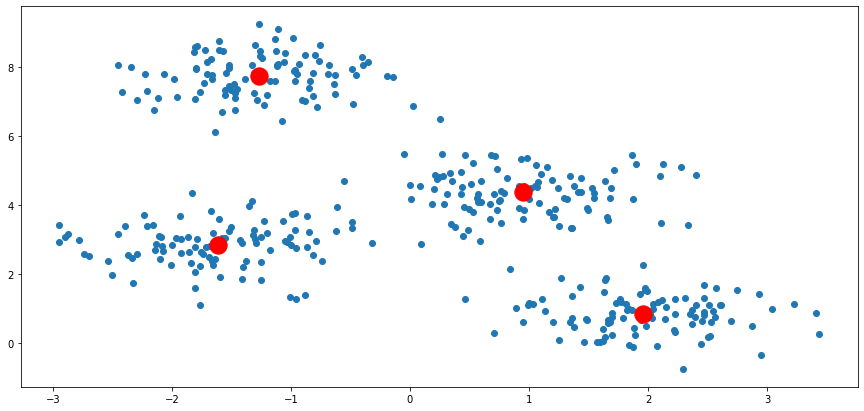

In [39]:
plt.figure(figsize=(15,7))
plt.scatter(X[:,0], X[:,1])
plt.scatter(new_centroids[:, 0],new_centroids[:, 1], s=300, c='red')
plt.show()